In [30]:
import pandas as pd

# File paths
file_paths = {
    'mental_illnesses_prevalence': 'C:/Users/thiag/MentalHealth/1- mental-illnesses-prevalence.csv',
    'adult_population_covered_in_primary_data_on_the_prevalence_of_major_depression': 'C:/Users/thiag/MentalHealth/3- adult-population-covered-in-primary-data-on-the-prevalence-of-major-depression.csv',
    'depressive_symptoms_across_us_population': 'C:/Users/thiag/MentalHealth/6- depressive-symptoms-across-us-population.csv',
}

# Create a dictionary to store the dataframes
dfs = {}

# Read the data from each file into a pandas DataFrame and store it in the dictionary
for name, file_path in file_paths.items():
    dfs[name] = pd.read_csv(file_path)

# This dataset provides the share of the population with depressive disorders for each country and year

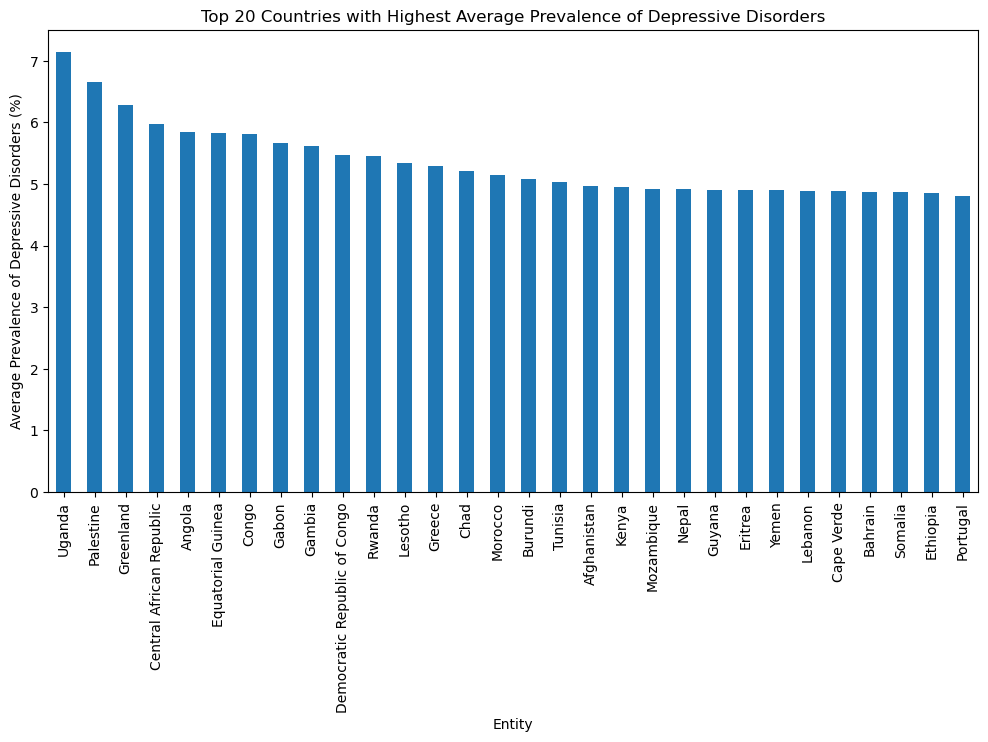

In [34]:
import matplotlib.pyplot as plt

# Calculate the average prevalence of depressive disorders for each country
average_depression_prevalence = dfs['mental_illnesses_prevalence'].groupby('Entity')['Depressive disorders (share of population) - Sex: Both - Age: Age-standardized'].mean().sort_values(ascending=False)

# Plot the top 20 countries with the highest average prevalence of depressive disorders
average_depression_prevalence[:30].plot(kind='bar', figsize=(12, 6))
plt.ylabel('Average Prevalence of Depressive Disorders (%)')
plt.title('Top 20 Countries with Highest Average Prevalence of Depressive Disorders')
plt.show()

# This dataset provides the percentage of the adult population covered in primary data on the prevalence of major depression for each region and year.

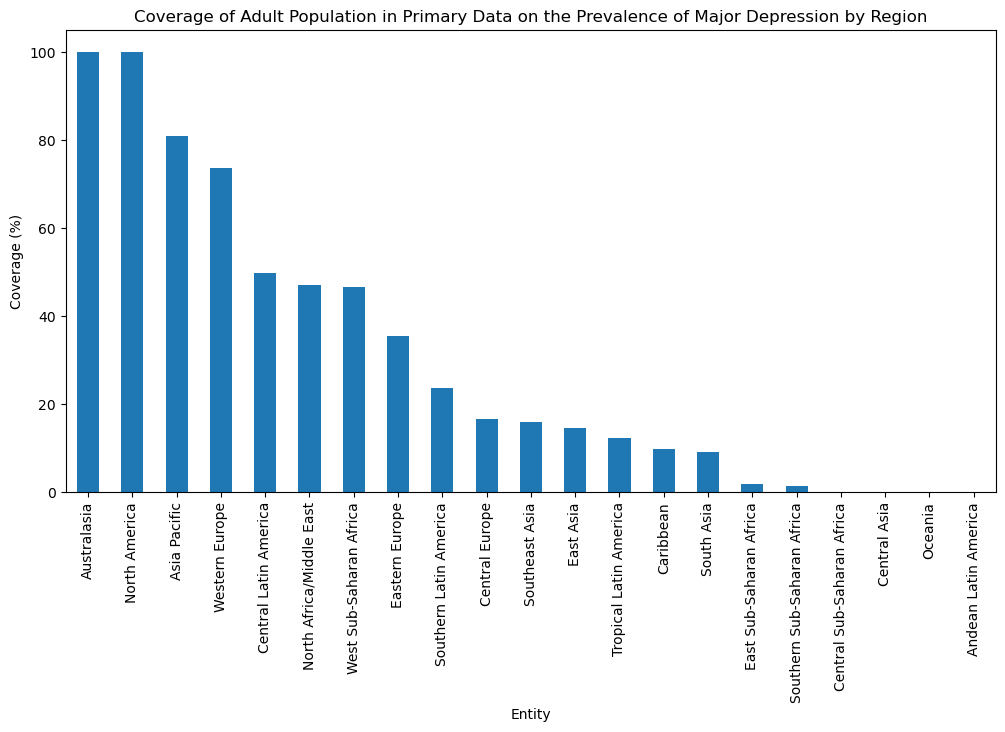

In [28]:
# Calculate the coverage for each region
coverage_per_region = dfs['adult_population_covered_in_primary_data_on_the_prevalence_of_major_depression'].set_index('Entity')['Major depression']

# Plot the coverage for each region
coverage_per_region.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.ylabel('Coverage (%)')
plt.title('Coverage of Adult Population in Primary Data on the Prevalence of Major Depression by Region')

# Filter out 'World' data
filtered_data = dfs['adult_population_covered_in_primary_data_on_the_prevalence_of_major_depression'][dfs['adult_population_covered_in_primary_data_on_the_prevalence_of_major_depression']['Entity'] != 'World']

# Calculate the coverage for each region
coverage_per_region = filtered_data.set_index('Entity')['Major depression']

# Plot the coverage for each region
coverage_per_region.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.ylabel('Coverage (%)')
plt.title('Coverage of Adult Population in Primary Data on the Prevalence of Major Depression by Region')
plt.show()



# This dataset provides the percentage of the US population experiencing various depressive symptoms for each year.

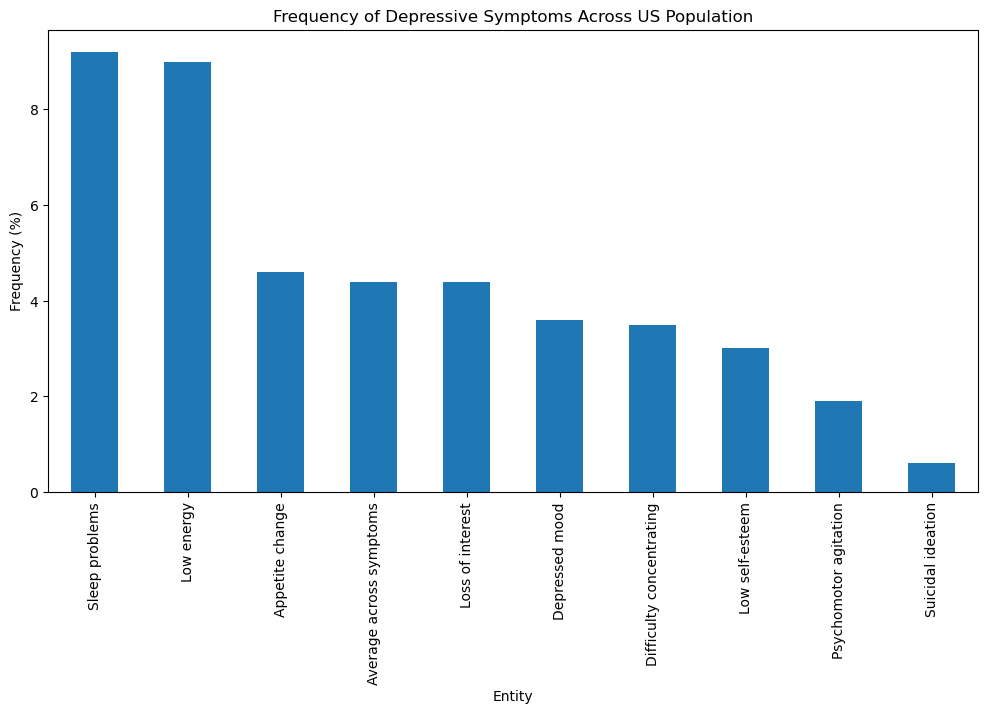

In [29]:
# Calculate the frequency for each symptom
frequency_per_symptom = dfs['depressive_symptoms_across_us_population'].set_index('Entity')['Nearly every day']

# Plot the frequency for each symptom
frequency_per_symptom.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.ylabel('Frequency (%)')
plt.title('Frequency of Depressive Symptoms Across US Population')
plt.show()

# Analyze the trend of depression disorders over the years. This will give an understanding of whether the prevalence of depression is increasing or decreasing over time. This analysis can be performed on the 'mental_illnesses_prevalence' dataset.

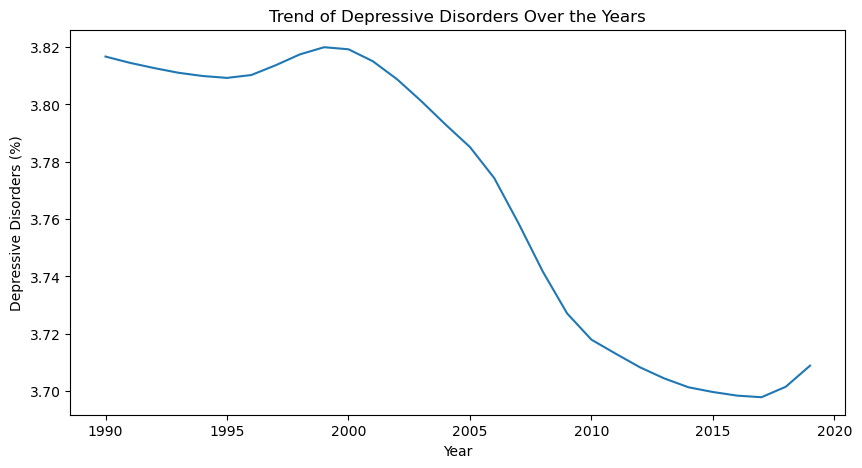

In [37]:
# Group by 'Year' and calculate the mean prevalence of depressive disorders
trend_data = dfs['mental_illnesses_prevalence'].groupby('Year')['Depressive disorders (share of population) - Sex: Both - Age: Age-standardized'].mean()

# Plot the trend
plt.figure(figsize=(10, 5))
trend_data.plot(kind='line')
plt.title('Trend of Depressive Disorders Over the Years')
plt.ylabel('Depressive Disorders (%)')
plt.show()


# Check if there's a correlation between the prevalence of depression and the year or country. This could help identify if certain years or countries are associated with a higher prevalence of depression.

In [39]:
# Compute correlation between 'Year' and 'Depressive disorders (share of population)'
correlation = dfs['mental_illnesses_prevalence'][['Year', 'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized']].corr()

print(correlation)

                                                        Year  \
Year                                                1.000000   
Depressive disorders (share of population) - Se... -0.049007   

                                                    Depressive disorders (share of population) - Sex: Both - Age: Age-standardized  
Year                                                                                        -0.049007                               
Depressive disorders (share of population) - Se...                                           1.000000                               


# If there is a temporal trend in the depression prevalence data, we could use regression analysis to predict the prevalence in future years. This could be done using simple linear regression if the trend is linear, or polynomial regression if the trend is more complex.

In [51]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Prepare the data
X = dfs['mental_illnesses_prevalence']['Year'].values.reshape(-1, 1)  # Feature (Year)
y = dfs['mental_illnesses_prevalence']['Depressive disorders (share of population) - Sex: Both - Age: Age-standardized']  # Target (Depressive disorders)

# Create and train the model
model = LinearRegression()
model.fit(X, y)

# Make predictions for the next 5 years
future_years = np.array([2020, 2021, 2022, 2023, 2024]).reshape(-1, 1)
predictions = model.predict(future_years)

print(predictions)



[3.68583778 3.68059919 3.6753606  3.67012201 3.66488343]


From these predictions, it appears that the model is predicting a slight decrease in the prevalence of depressive disorders over the next five years. This is only a prediction, and the actual future prevalence could be influenced by many factors not included in the model.

# Perform a cluster analysis to group countries based on their depression prevalence and other mental health metrics. This could help identify countries with similar mental health profiles.

In [56]:
from sklearn.cluster import KMeans

# Prepare the data
data = dfs['mental_illnesses_prevalence'][['Depressive disorders (share of population) - Sex: Both - Age: Age-standardized', 'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized']]

# Create and fit the model
kmeans = KMeans(n_clusters=3, n_init=10)  # explicitly set n_init to 10
kmeans.fit(data)

# Get the cluster labels and add them to the DataFrame
dfs['mental_illnesses_prevalence']['Cluster'] = kmeans.labels_

print(dfs['mental_illnesses_prevalence'])


           Entity Code  Year  \
0     Afghanistan  AFG  1990   
1     Afghanistan  AFG  1991   
2     Afghanistan  AFG  1992   
3     Afghanistan  AFG  1993   
4     Afghanistan  AFG  1994   
...           ...  ...   ...   
6415     Zimbabwe  ZWE  2015   
6416     Zimbabwe  ZWE  2016   
6417     Zimbabwe  ZWE  2017   
6418     Zimbabwe  ZWE  2018   
6419     Zimbabwe  ZWE  2019   

      Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                              0.223206                                   
1                                              0.222454                                   
2                                              0.221751                                   
3                                              0.220987                                   
4                                              0.220183                                   
...                                                 ...              

In [57]:
print(dfs['mental_illnesses_prevalence']['Cluster'].value_counts())

1    3039
0    2225
2    1156
Name: Cluster, dtype: int64


In [59]:
print(dfs['mental_illnesses_prevalence'].groupby('Cluster').mean(numeric_only=True))

                Year  \
Cluster                
0        2003.915955   
1        2004.854557   
2        2004.692042   

         Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized  \
Cluster                                                                                      
0                                                 0.236834                                   
1                                                 0.278482                                   
2                                                 0.292679                                   

         Depressive disorders (share of population) - Sex: Both - Age: Age-standardized  \
Cluster                                                                                   
0                                                 4.711540                                
1                                                 3.086838                                
2                                           

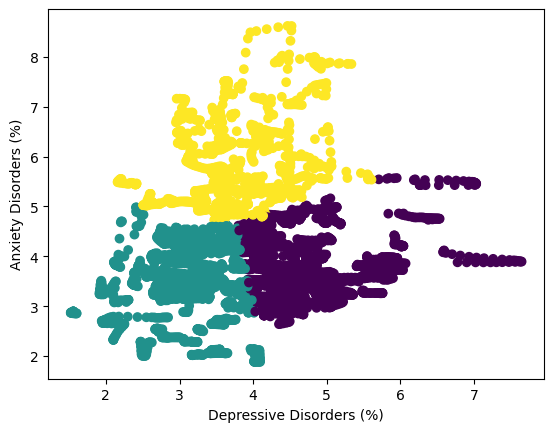

In [60]:
import matplotlib.pyplot as plt

plt.scatter(dfs['mental_illnesses_prevalence']['Depressive disorders (share of population) - Sex: Both - Age: Age-standardized'], dfs['mental_illnesses_prevalence']['Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized'], c=dfs['mental_illnesses_prevalence']['Cluster'])
plt.xlabel('Depressive Disorders (%)')
plt.ylabel('Anxiety Disorders (%)')
plt.show()